## Exploring Earnings in Esports

In this project, I will be exploring data about various esports events. For anyone unfamiliar with esports, esports can be seen as form of [sporting competition with video games](https://en.wikipedia.org/wiki/Esports)(as per wikipedia) rewarding monetary prizes, and often times, competitors are either professional individual or teams. I will be looking over a dataset collection of various esports tournaments from 1998-2020. The dataset I will be using can be found [here](https://www.kaggle.com/rankirsh/esports-earnings) by user `Ran.Kirsh`. 

My goal for this project is to uncover which genre/game title is most popular in esports as of 2020, and if I were part of a company that does game development, which direction would I take if I wanted to make a game to enter esports. 

## Exploring the Dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

# set options for pandas to display all columns
pd.set_option('display.max_columns', None)  # or 1000

# set options for pandas to display all rows
pd.set_option('display.max_rows', None)  # or 1000

# set options for pandas to adjust column width
pd.set_option('display.max_colwidth', 50)  # or 199

# set options for pandas format float numbers to include commas and periods
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# read in data using encoding iso-8859-1 to fix unicode error
esports_data = pd.read_csv("GeneralEsportData.csv", encoding = "iso-8859-1")

In [3]:
# Print the DataFrame for initial observations
esports_data

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,"190,075.61","33,235.72",246,95
1,Age of Empires II,1999,Strategy,"1,425,482.01","808,422.14",811,513
2,Age of Empires III,2005,Strategy,"66,463.85","24,963.85",86,72
3,Age of Empires Online,2011,Strategy,"1,800.00","1,800.00",11,5
4,Age of Mythology,2002,Strategy,"52,360.00",360.00,22,6
5,Auto Chess,2019,Strategy,"1,076,322.28","40,800.00",72,6
6,Brawl Stars,2018,Strategy,"94,950.00","8,700.00",51,10
7,Chess.com,2007,Strategy,"735,990.96","735,990.96",542,139
8,chess24,2014,Strategy,"634,696.09","634,696.09",55,7
9,Clash of Clans,2012,Strategy,"751,576.87",0.00,77,3


In [4]:
# Print information about the Dataset
esports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              459 non-null    object 
 1   ReleaseDate       459 non-null    int64  
 2   Genre             459 non-null    object 
 3   TotalEarnings     459 non-null    float64
 4   OnlineEarnings    459 non-null    float64
 5   TotalPlayers      459 non-null    int64  
 6   TotalTournaments  459 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 25.2+ KB


In [5]:
# Observe the different genres in the dataset
esports_data['Genre'].value_counts()

Fighting Game                      137
First-Person Shooter               103
Sports                              66
Racing                              48
Strategy                            42
Multiplayer Online Battle Arena     20
Collectible Card Game               14
Puzzle Game                         10
Battle Royale                        8
Third-Person Shooter                 6
Role-Playing Game                    5
Name: Genre, dtype: int64

In [6]:
# Observe the range of years in the dataset
esports_data['ReleaseDate'].value_counts().sort_index()

1981     1
1989     1
1993     2
1994     4
1995     2
1996     3
1997     4
1998     4
1999    11
2000     5
2001     8
2002    11
2003    13
2004    19
2005    17
2006    12
2007    26
2008    19
2009    11
2010    18
2011    18
2012    20
2013    27
2014    21
2015    36
2016    33
2017    37
2018    32
2019    31
2020    13
Name: ReleaseDate, dtype: int64

In [7]:
# Observe the number of games within each year
esports_data['ReleaseDate'].value_counts().sort_values()

1981     1
1989     1
1993     2
1995     2
1996     3
1994     4
1997     4
1998     4
2000     5
2001     8
1999    11
2002    11
2009    11
2006    12
2020    13
2003    13
2005    17
2010    18
2011    18
2004    19
2008    19
2012    20
2014    21
2007    26
2013    27
2019    31
2018    32
2016    33
2015    36
2017    37
Name: ReleaseDate, dtype: int64

In [8]:
# Observe information about TotalEarnings
esports_data['TotalEarnings'].describe()

count           459.00
mean      1,841,080.61
std      12,994,200.30
min               0.00
25%           2,037.05
50%          41,523.71
75%         246,241.14
max     225,501,326.46
Name: TotalEarnings, dtype: float64

## Initial Observations
In my initial observations, there does not seem to be any missing data and the columns are using correct data types. I see that although this dataset is for games released from 1998-2020, there is one game called `Pac-man` in this list that was developed in 1981. This will not affect the dataset considering it is only one game title of a total of 459 entries.

Games involved in esports did not hit double digit releases until 1999 with a count of 11, and after some underlying research on Google, I discovered that it wasn't until about the 2000's did esports start seeing more growth. After sorting the release dates, I can see that there is definitely growth in the esports industry as the numbers of released games has increased through the years. The top three most popular genres include, `Fighting Game`, `First-Person Shooter`, and `Sports`. There is a huge range in total earnings from at least `$0` to `$225,000,000`. I want to observe profits in esports and not esports in its early stages of growth, so I will shift my analysis to focus on the esports industry in the last 10 years where most game releases have occured and observe profits in those titles that may still be relevant in present day.

## Data Wrangling and setting up for Analysis
I will first create a subset of the original dataset to reflect data from just the past 10 years.

In [9]:
# Create a dataframe to contain only values from the previous 10 years
# This creates a View of the slice of a Dataframe
last_10_years_esports = esports_data[esports_data["ReleaseDate"] >= 2010]

In [10]:
# Observe the changes of the last 10 year dataset
# Use .copy() to create a new dataframe and not a View.
last_10_years_esports

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
3,Age of Empires Online,2011,Strategy,"1,800.00","1,800.00",11,5
5,Auto Chess,2019,Strategy,"1,076,322.28","40,800.00",72,6
6,Brawl Stars,2018,Strategy,"94,950.00","8,700.00",51,10
8,chess24,2014,Strategy,"634,696.09","634,696.09",55,7
9,Clash of Clans,2012,Strategy,"751,576.87",0.00,77,3
10,Clash Royale,2016,Strategy,"2,293,020.39","65,109.29",222,39
12,Company of Heroes 2,2013,Strategy,"8,561.22",605.00,11,6
13,ComPet,2016,Strategy,"2,000.00","2,000.00",50,1
14,Dota Underlords,2019,Strategy,"26,024.18","26,024.18",62,36
15,Endgods,2015,Strategy,0.00,0.00,0,0


In [11]:
# Explore dataset
last_10_years_esports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 3 to 458
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              286 non-null    object 
 1   ReleaseDate       286 non-null    int64  
 2   Genre             286 non-null    object 
 3   TotalEarnings     286 non-null    float64
 4   OnlineEarnings    286 non-null    float64
 5   TotalPlayers      286 non-null    int64  
 6   TotalTournaments  286 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 17.9+ KB


In [12]:
# Observe Earnings in new dataset
last_10_years_esports['TotalEarnings'].describe()

count           286.00
mean      2,450,352.55
std      15,772,185.13
min               0.00
25%           1,765.83
50%          47,650.03
75%         450,228.29
max     225,501,326.46
Name: TotalEarnings, dtype: float64

So I now have 286 entries compared to the previous of 459, but our range in earnings is still the same. Another approach I could take is to remove all titles with $0 value considering I only want to observe profits and those titles do not have profits listed in esports events.

In [13]:
# Remove columns with TotalEarnings of $0
last_10_years_esports = last_10_years_esports[last_10_years_esports["TotalEarnings"] != 0]

In [14]:
last_10_years_esports

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
3,Age of Empires Online,2011,Strategy,"1,800.00","1,800.00",11,5
5,Auto Chess,2019,Strategy,"1,076,322.28","40,800.00",72,6
6,Brawl Stars,2018,Strategy,"94,950.00","8,700.00",51,10
8,chess24,2014,Strategy,"634,696.09","634,696.09",55,7
9,Clash of Clans,2012,Strategy,"751,576.87",0.00,77,3
10,Clash Royale,2016,Strategy,"2,293,020.39","65,109.29",222,39
12,Company of Heroes 2,2013,Strategy,"8,561.22",605.00,11,6
13,ComPet,2016,Strategy,"2,000.00","2,000.00",50,1
14,Dota Underlords,2019,Strategy,"26,024.18","26,024.18",62,36
16,Farming Simulator 19,2018,Strategy,"158,361.30","38,915.49",84,12


In [15]:
last_10_years_esports["TotalEarnings"].describe()

count           256.00
mean      2,737,503.24
std      16,650,488.34
min              50.00
25%           5,472.78
50%          71,446.04
75%         554,613.95
max     225,501,326.46
Name: TotalEarnings, dtype: float64

Removing titles with `$0` `TotalEarnings` removed 30 titles with no profits. Considering this is suppose to be a dataset that is about earnings in esports, having no earnings is of no use to us and probably means the titles were not relevant in esports.

In [16]:
last_10_years_esports[last_10_years_esports["TotalPlayers"] == 0]

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
104,MechWarrior Online,2013,First-Person Shooter,"143,490.00",0.00,0,1
156,Legend of Glory,2015,Multiplayer Online Battle Arena,472.66,472.66,0,1
233,Mordhau,2019,Fighting Game,123.00,123.00,0,1


Upon browsing the last 10 year dataset, I noticed that in the `TotalPlayers` columns that there were some values that include `0` for a few of the games. So I did some more research and found that 3 game titles had `0` value for `TotalPlayers`. This is fine, I just wanted to make sure that there were not too many instances of zeros for that column. Even so, I do not believe it would be a problem considering maybe not every event would potentially be recording the amount of players. My initial though was that I found it to be bizarre since there exists a value for `TotalTournament` but the tournaments had no players.

I want to add another column to this dataset in which we can see how many years it has been since the release of the game titles.

In [17]:
# To Prevent SettingWithCopy warning when creating a new column
last_10_years_esports = last_10_years_esports.copy()

In [18]:
#last_10_years_esports.loc[:,"YearsAfterRelease"] = 2020 - last_10_years_esports["ReleaseDate"]

In [19]:
last_10_years_esports["YearsAfterRelease"] = 2020 - last_10_years_esports["ReleaseDate"]

In [20]:
last_10_years_esports

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,YearsAfterRelease
3,Age of Empires Online,2011,Strategy,"1,800.00","1,800.00",11,5,9
5,Auto Chess,2019,Strategy,"1,076,322.28","40,800.00",72,6,1
6,Brawl Stars,2018,Strategy,"94,950.00","8,700.00",51,10,2
8,chess24,2014,Strategy,"634,696.09","634,696.09",55,7,6
9,Clash of Clans,2012,Strategy,"751,576.87",0.00,77,3,8
10,Clash Royale,2016,Strategy,"2,293,020.39","65,109.29",222,39,4
12,Company of Heroes 2,2013,Strategy,"8,561.22",605.00,11,6,7
13,ComPet,2016,Strategy,"2,000.00","2,000.00",50,1,4
14,Dota Underlords,2019,Strategy,"26,024.18","26,024.18",62,36,1
16,Farming Simulator 19,2018,Strategy,"158,361.30","38,915.49",84,12,2


In [21]:
# Make a list of the column names for column reoganizing
column_names = ['Game', 'ReleaseDate', 'YearsAfterRelease', 'Genre', 'TotalEarnings', 'OnlineEarnings', 'TotalPlayers',
               'TotalTournaments']

# Reorganize the columns
last_10_years_esports = last_10_years_esports.reindex(columns=column_names)

In [22]:
# Observe Changes
last_10_years_esports

,Game,ReleaseDate,YearsAfterRelease,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
3,Age of Empires Online,2011,9,Strategy,"1,800.00","1,800.00",11,5
5,Auto Chess,2019,1,Strategy,"1,076,322.28","40,800.00",72,6
6,Brawl Stars,2018,2,Strategy,"94,950.00","8,700.00",51,10
8,chess24,2014,6,Strategy,"634,696.09","634,696.09",55,7
9,Clash of Clans,2012,8,Strategy,"751,576.87",0.00,77,3
10,Clash Royale,2016,4,Strategy,"2,293,020.39","65,109.29",222,39
12,Company of Heroes 2,2013,7,Strategy,"8,561.22",605.00,11,6
13,ComPet,2016,4,Strategy,"2,000.00","2,000.00",50,1
14,Dota Underlords,2019,1,Strategy,"26,024.18","26,024.18",62,36
16,Farming Simulator 19,2018,2,Strategy,"158,361.30","38,915.49",84,12


I cleaned the dataset some more and dealt with other underlying issues I discovered along the way. I should be ready to start making analysis with the new dataset I created in this section.

## Analyze the Dataset

My goal is to discover popular genres/game title in esports and what kind of game I would make if I wanted to go into esports. So, I need to explore what are player's interests right now that could generate profits. What I can do is explore the `TotalEarnings`, `Genre`, and `TotalTournaments` of a game title and see what I can discover there.

In [23]:
last_10_years_esports['TotalEarnings'].describe()

count           256.00
mean      2,737,503.24
std      16,650,488.34
min              50.00
25%           5,472.78
50%          71,446.04
75%         554,613.95
max     225,501,326.46
Name: TotalEarnings, dtype: float64

In [24]:
# CONSIDER DELETING
# Create a list of the top 15 game titles with the highest earnings
#top_15_esports = last_10_years_esports.sort_values('TotalEarnings', ascending=False).head(15).copy()

In [25]:
# Sort DataFrame Based on TotalEarnings
esports_sorted = last_10_years_esports.sort_values('TotalEarnings', ascending=False).copy()

In [26]:
esports_sorted.head(15)

,Game,ReleaseDate,YearsAfterRelease,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
151,Dota 2,2013,7,Multiplayer Online Battle Arena,"225,501,326.46","11,994,638.14",3714,1402
73,Counter-Strike: Global Offensive,2012,8,First-Person Shooter,"99,258,929.93","23,854,990.09",12947,5109
446,Fortnite,2017,3,Battle Royale,"90,037,277.34","48,079,678.46",3352,564
25,StarCraft II,2010,10,Strategy,"33,322,573.08","4,635,613.75",2064,5871
450,PLAYERUNKNOWNS BATTLEGROUNDS,2017,3,Battle Royale,"23,333,378.57","3,631,852.71",2749,292
106,Overwatch,2016,4,First-Person Shooter,"22,049,333.28","3,822,852.83",3494,740
426,Hearthstone,2014,6,Collectible Card Game,"21,655,336.92","3,179,157.35",2364,876
154,Heroes of the Storm,2015,5,Multiplayer Online Battle Arena,"18,170,133.73","3,973,717.78",1205,459
145,Arena of Valor,2015,5,Multiplayer Online Battle Arena,"14,556,095.63","279,000.00",536,49
117,Rainbow Six Siege,2015,5,First-Person Shooter,"12,159,469.70","2,172,256.57",1527,226


From this new sorted dataframe of the listed games we can see that profits start to fall off substantially after the top 3 games and goes on a steady decline. Let's create two new columns to explore some averages I can get out of `TotalEarnings`.

In [27]:
# Create column for TotalEarnings/YearsAfterRelease
esports_sorted['AvgEarningsPerYear'] = esports_sorted['TotalEarnings'] / esports_sorted['YearsAfterRelease']

#Create column for TotalEarnings/TotalTournaments
esports_sorted['AvgEarningsPerTournament'] = esports_sorted['TotalEarnings'] / esports_sorted['TotalTournaments']

In [28]:
# Make a list of the column names for column reoganizing
column_names = ['Game', 'ReleaseDate', 'YearsAfterRelease', 'Genre', 'TotalEarnings', 'OnlineEarnings', 'AvgEarningsPerYear', 'AvgEarningsPerTournament', 'TotalPlayers',
               'TotalTournaments']

# Reorganize the columns
esports_sorted = esports_sorted.reindex(columns=column_names)

In [29]:
esports_sorted.sort_values('AvgEarningsPerYear', ascending=False).head(15)

,Game,ReleaseDate,YearsAfterRelease,Genre,TotalEarnings,OnlineEarnings,AvgEarningsPerYear,AvgEarningsPerTournament,TotalPlayers,TotalTournaments
422,Artifact 2.0,2020,0,Collectible Card Game,50.00,50.00,inf,50.00,1,1
68,Call of Duty: Warzone,2020,0,First-Person Shooter,"1,116,163.37","1,116,163.37",inf,"21,464.68",327,52
272,Street Fighter V: Champion Edition,2020,0,Fighting Game,"1,000.00",0.00,inf,"1,000.00",4,1
301,Under Night In-Birth Exe:Late[cl-r],2020,0,Fighting Game,"1,000.00",0.00,inf,"1,000.00",4,1
441,Tetr.io,2020,0,Puzzle Game,"2,002.30","2,002.30",inf,286.04,9,7
344,Trackmania (2020),2020,0,Racing,"5,283.33","5,283.33",inf,880.55,18,6
81,Diabotical,2020,0,First-Person Shooter,"5,535.93","5,535.93",inf,425.84,46,13
22,Prophecy,2020,0,Strategy,"13,000.00","13,000.00",inf,"3,250.00",27,4
427,Legends of Runeterra,2020,0,Collectible Card Game,"18,481.03","18,481.03",inf,"6,160.34",14,3
87,Escape from Tarkov,2020,0,First-Person Shooter,"54,600.00","54,600.00",inf,"27,300.00",3,2


When doing calculations for game titles created in 2020, we can see that we get a incorrect value of `inf`. Although the value is incorrect that the average earnings is `infinite`. We can still observe that game titles created in 2020 were not profitable by viewing the `TotalEarnings` and `AvgEarningsPerTournament` for those respective games that had `AvgEarningsPerYear` of `inf`. 

No game titles in 2020 were in the top in `TotalEarnings` or `AvgEarningsPerTournament`, and as of right now, it can be safe to be and removed from the dataset for the time being. It is not to say this is not relevant information, having low earnings for new games(games released in 2020 as of now) shows that if I had a company wanting to go into esports, the company has to understand that profits may not come in the first year of release. Removing these titles will allow us to continue to analyze profits of more distinguished game titles.

In [30]:
# Removed Game Titles released in 2020
esports_sorted = esports_sorted[esports_sorted["ReleaseDate"] != 2020]

In [31]:
# Check Changes
esports_sorted.sort_values('AvgEarningsPerYear', ascending=False).head(15)

,Game,ReleaseDate,YearsAfterRelease,Genre,TotalEarnings,OnlineEarnings,AvgEarningsPerYear,AvgEarningsPerTournament,TotalPlayers,TotalTournaments
151,Dota 2,2013,7,Multiplayer Online Battle Arena,"225,501,326.46","11,994,638.14","32,214,475.21","160,842.60",3714,1402
446,Fortnite,2017,3,Battle Royale,"90,037,277.34","48,079,678.46","30,012,425.78","159,640.56",3352,564
73,Counter-Strike: Global Offensive,2012,8,First-Person Shooter,"99,258,929.93","23,854,990.09","12,407,366.24","19,428.25",12947,5109
450,PLAYERUNKNOWNS BATTLEGROUNDS,2017,3,Battle Royale,"23,333,378.57","3,631,852.71","7,777,792.86","79,908.83",2749,292
106,Overwatch,2016,4,First-Person Shooter,"22,049,333.28","3,822,852.83","5,512,333.32","29,796.40",3494,740
445,Apex Legends,2019,1,Battle Royale,"3,724,901.69","1,710,480.94","3,724,901.69","24,345.76",1049,153
154,Heroes of the Storm,2015,5,Multiplayer Online Battle Arena,"18,170,133.73","3,973,717.78","3,634,026.75","39,586.35",1205,459
60,Call of Duty: Black Ops 4,2018,2,First-Person Shooter,"7,264,452.00","321,377.00","3,632,226.00","89,684.59",437,81
426,Hearthstone,2014,6,Collectible Card Game,"21,655,336.92","3,179,157.35","3,609,222.82","24,720.70",2364,876
25,StarCraft II,2010,10,Strategy,"33,322,573.08","4,635,613.75","3,332,257.31","5,675.79",2064,5871


In [32]:
esports_sorted.sort_values('AvgEarningsPerTournament', ascending=False).head(15)

,Game,ReleaseDate,YearsAfterRelease,Genre,TotalEarnings,OnlineEarnings,AvgEarningsPerYear,AvgEarningsPerTournament,TotalPlayers,TotalTournaments
31,TEPPEN,2019,1,Strategy,"456,721.47",0.00,"456,721.47","456,721.47",12,1
390,Madden NFL 2013,2012,8,Sports,"400,000.00",0.00,"50,000.00","400,000.00",8,1
145,Arena of Valor,2015,5,Multiplayer Online Battle Arena,"14,556,095.63","279,000.00","2,911,219.13","297,063.18",536,49
313,F1 2019,2019,1,Racing,"538,047.38",0.00,"538,047.38","269,023.69",25,2
9,Clash of Clans,2012,8,Strategy,"751,576.87",0.00,"93,947.11","250,525.62",77,3
396,NBA 2K18,2017,3,Sports,"1,000,000.00",0.00,"333,333.33","250,000.00",91,4
392,Madden NFL 2017,2016,4,Sports,"1,004,000.00",0.00,"251,000.00","200,800.00",42,5
312,F1 2018,2018,2,Racing,"200,000.00",0.00,"100,000.00","200,000.00",21,1
5,Auto Chess,2019,1,Strategy,"1,076,322.28","40,800.00","1,076,322.28","179,387.05",72,6
379,FIFA Online 4,2018,2,Sports,"679,240.00",0.00,"339,620.00","169,810.00",84,4


In [33]:
# Create a dictionary of the TotalEarnings by Genre
esports_total = esports_sorted.groupby('Genre')['TotalEarnings'].sum().to_dict()

# Convert Dictionary to DataFrame
esports_total = pd.DataFrame.from_dict(esports_total, orient="index")
esports_total.rename(columns={0:"TotalEarnings"}, inplace=True)
esports_total = esports_total.sort_values(by="TotalEarnings")
esports_total

,TotalEarnings
Puzzle Game,"6,696.74"
Role-Playing Game,"1,307,865.22"
Third-Person Shooter,"3,764,540.81"
Racing,"4,257,415.46"
Fighting Game,"16,953,337.39"
Sports,"24,246,918.48"
Collectible Card Game,"31,466,545.64"
Strategy,"43,824,392.12"
Battle Royale,"123,873,724.90"
First-Person Shooter,"178,206,578.07"


In [34]:
esports_avg_year_total = esports_sorted.groupby('Genre')['AvgEarningsPerYear'].sum().to_dict()
esports_avg_year_total = pd.DataFrame.from_dict(esports_avg_year_total, orient="index")
esports_avg_year_total.rename(columns={0:"AvgEarningsPerYear"}, inplace=True)
esports_avg_year_total = esports_avg_year_total.sort_values(by="AvgEarningsPerYear")
esports_avg_year_total

,AvgEarningsPerYear
Puzzle Game,"2,915.12"
Role-Playing Game,"171,027.87"
Third-Person Shooter,"1,306,627.45"
Racing,"1,316,479.89"
Fighting Game,"4,973,937.64"
Strategy,"6,903,027.12"
Collectible Card Game,"7,478,084.57"
Sports,"7,558,846.41"
First-Person Shooter,"33,493,129.50"
Multiplayer Online Battle Arena,"40,759,009.88"


In [35]:
esports_avg_tournament_total = esports_sorted.groupby('Genre')['AvgEarningsPerTournament'].sum().to_dict()
esports_avg_tournament_total = pd.DataFrame.from_dict(esports_avg_tournament_total, orient="index")
esports_avg_tournament_total.rename(columns={0:"AvgEarningsPerTournament"}, inplace=True)
esports_avg_tournament_total = esports_avg_tournament_total.sort_values(by="AvgEarningsPerTournament")
esports_avg_tournament_total

,AvgEarningsPerTournament
Puzzle Game,"1,553.06"
Role-Playing Game,"109,426.81"
Fighting Game,"244,014.21"
Third-Person Shooter,"258,780.25"
Collectible Card Game,"270,385.83"
Battle Royale,"614,616.69"
Racing,"762,825.26"
Multiplayer Online Battle Arena,"770,221.78"
Strategy,"1,234,392.70"
First-Person Shooter,"1,296,446.27"


By creating the `AvgEarningsPerYear`, we can see games with the higher `TotalEarnings` and `AvgEarningsPerYear` also have a lot of tournaments, but do not necessarily have higher averages when it comes to `AvgEarningsPerTournament`. When we take a look `AvgEarningsPerTournament`, we see that game titles with higher `AvgEarningsPerTournament` do not necessarily have high tournaments and they do not all have a higher `TotalEarning`.

## Visualizing the Data
In this section, I will create visualization out of the information I have observed so far. I will start by looking at the `Genre` columns of `esports_data` and `esports_sorted`

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Count')

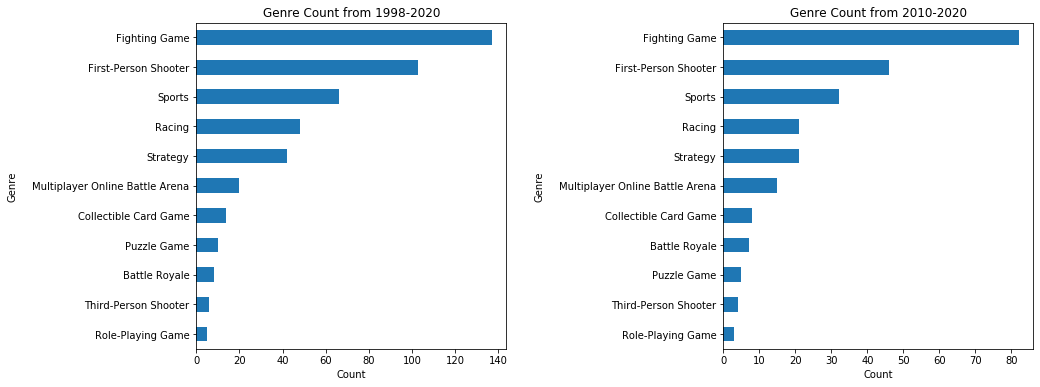

In [37]:
# Create figure and axes
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=[15,6])
fig1.subplots_adjust(wspace=.7)

# Genre count of whole dataset
esports_data['Genre'].value_counts(ascending=True).plot(kind='barh', ax=ax1)
ax1.set_title('Genre Count from 1998-2020')
ax1.set_ylabel('Genre', labelpad=15)
ax1.set_xlabel('Count')

# Genre count of last 10 years
esports_sorted['Genre'].value_counts(ascending=True).plot(kind='barh', ax=ax2)
ax2.set_title('Genre Count from 2010-2020')
ax2.set_ylabel('Genre', labelpad=15)
ax2.set_xlabel('Count')

When observing the changes from excluding anything before 2010, we can see that not much has change with the genre count. The slightest of difference is the swapped position of `Strategy` and `Racing` games.

[Text(0, 0, '0'),
 Text(0, 0, '50'),
 Text(0, 0, '100'),
 Text(0, 0, '150'),
 Text(0, 0, '200'),
 Text(0, 0, '250')]

C:\Users\yanri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yanri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


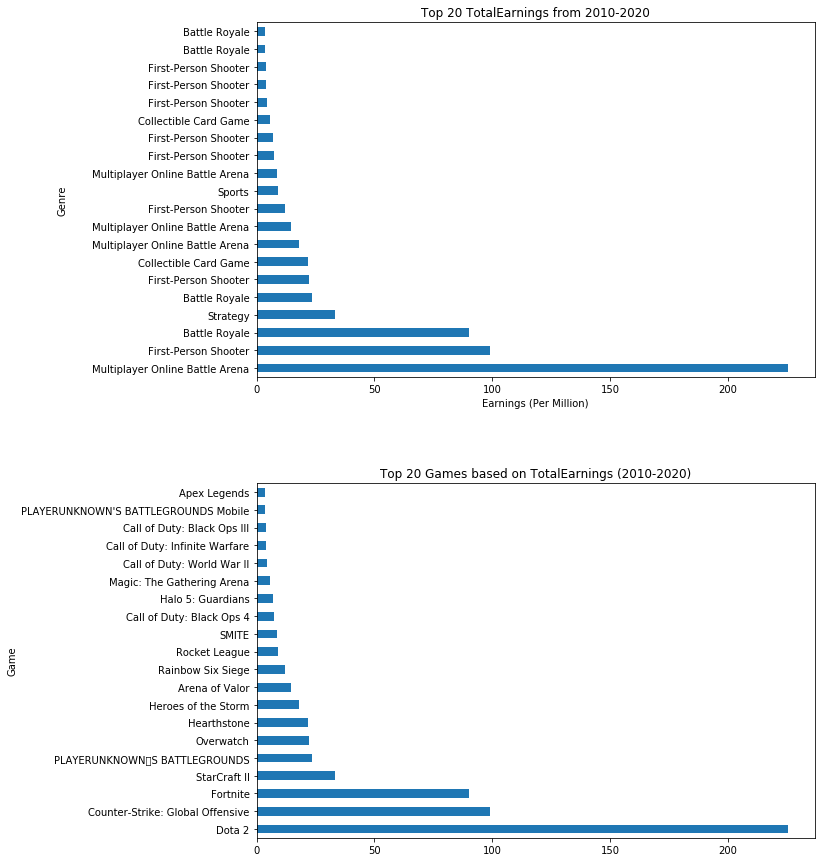

In [38]:
# Graph Top 20 TotalEarnings Genre
fig2, (ax3, ax4) = plt.subplots(2,1, figsize=(20,10))
fig2.subplots_adjust(hspace=.3)

# Graph on ax3
esports_sorted.iloc[0:20,:].plot(x='Genre', y='TotalEarnings', kind='barh', figsize=[10,15], legend=None, ax=ax3)
ax3.set_title('Top 20 TotalEarnings from 2010-2020')

# Adjust x,y labels
ax3.set_xlabel('Earnings (Per Million)')
ax3.set_ylabel('Genre', labelpad=25)
ax3.set_xticklabels([0, 50, 100, 150, 200, 250])

#Graph on ax4
esports_sorted.iloc[0:20,:].plot(x='Game', y='TotalEarnings', kind='barh', figsize=[10,15], legend=None, ax=ax4)
ax4.set_title('Top 20 Games based on TotalEarnings (2010-2020)')
ax4.set_xticklabels([0, 50, 100, 150, 200, 250])


# relabel the axis with new ticks and labels
# ticks = [0, 50000000, 100000000, 150000000, 200000000, 250000000]
# labels = [0, 50, 100, 150, 200, 250]
# ax3.set_xticks(ticks, labels)

In [39]:
# Compare to Graph Above
esports_sorted['Genre'].head(20).value_counts()

First-Person Shooter               8
Battle Royale                      4
Multiplayer Online Battle Arena    4
Collectible Card Game              2
Sports                             1
Strategy                           1
Name: Genre, dtype: int64

In the top 20 `TotalEarnings`, we can see that there is a huge drop off of `TotalEarnings` from `Dota 2` to `Counter-Strike Global Offensive` and then again from `Fortnite` to ` Starcraft`. Starting from `Starcraft` we see a steady decline of the `TotalEarnings`. Of the four games mentioned(the top four), all of these games are of different genres, as we can see from the graph.

[Text(0, 0, '0'),
 Text(0, 0, '50,000,000'),
 Text(0, 0, '100,000,000'),
 Text(0, 0, '150,000,000'),
 Text(0, 0, '200,000,000'),
 Text(0, 0, '250,000,000'),
 Text(0, 0, '300,000,000')]

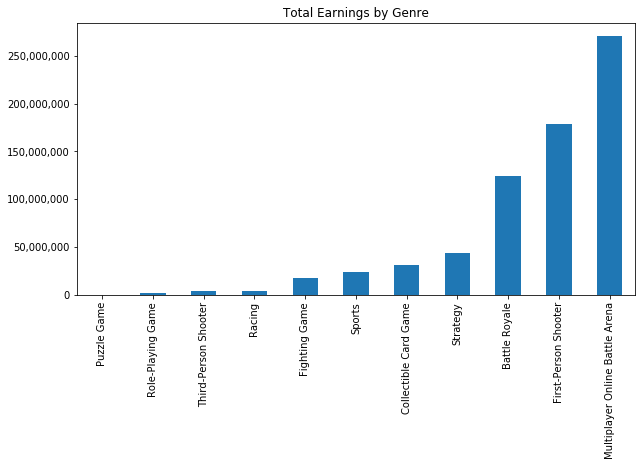

In [40]:
# Plot TotalEarnings By Genre
ax5 = esports_total.plot(kind='bar', legend=None, figsize=(10,5))
ax5.set_title('Total Earnings by Genre')
# turn off scientific notation if I didn't relabel the x-axis
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

# Add commas in y-tickers
ax5.set_yticklabels(['{:,}'.format(int(x)) for x in ax5.get_yticks().tolist()])

In this graph, we can observe the `TotalEarnings` and see quite clearly which genres standout more than the others. The top three genres that standout the most from highest to lowest are `Multiplayer Online Battle Arena`, `First-Person Shooter`, and `Battle Royale`.

[Text(0, 0, '0'),
 Text(0, 0, '10,000,000'),
 Text(0, 0, '20,000,000'),
 Text(0, 0, '30,000,000'),
 Text(0, 0, '40,000,000'),
 Text(0, 0, '50,000,000')]

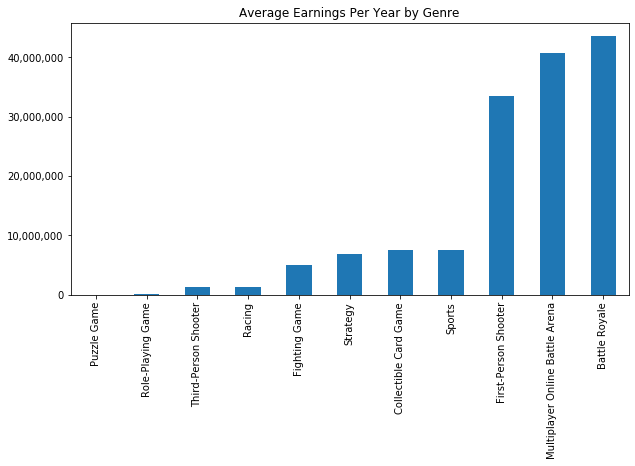

In [41]:
ax6 = esports_avg_year_total.plot(kind='bar', legend=None, figsize=(10,5))
ax6.set_title('Average Earnings Per Year by Genre')
# turn off scientific notation if I didn't relabel the x-axis
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

# Add commas in y-tickers
ax6.set_yticklabels(['{:,}'.format(int(x)) for x in ax6.get_yticks().tolist()])

When looking at the `Average Earnings Per Year` graph, we can see that the top three from highest to lowest are `Battle Royale`, `Multiplayer Online Battle Arena`, and `First-Person Shooter`.

[Text(0, 0, '0'),
 Text(0, 0, '250,000'),
 Text(0, 0, '500,000'),
 Text(0, 0, '750,000'),
 Text(0, 0, '1,000,000'),
 Text(0, 0, '1,250,000'),
 Text(0, 0, '1,500,000'),
 Text(0, 0, '1,750,000'),
 Text(0, 0, '2,000,000'),
 Text(0, 0, '2,250,000')]

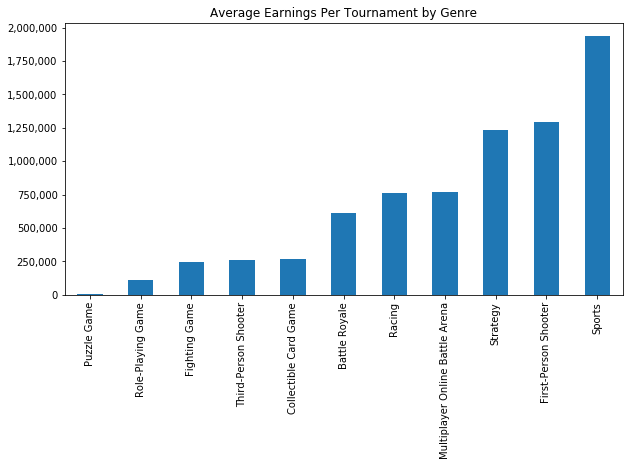

In [42]:
ax7 = esports_avg_tournament_total.plot(kind='bar', legend=None, figsize=(10,5))
ax7.set_title('Average Earnings Per Tournament by Genre')
# turn off scientific notation if I didn't relabel the x-axis
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

# Add commas in y-tickers
ax7.set_yticklabels(['{:,}'.format(int(x)) for x in ax7.get_yticks().tolist()])

From the `Average Per Tournament` graph, we can see the top three earning genres are `Sports`, `First-Person Shooter`, and `Strategy`.

## Conclusion